<a href="https://colab.research.google.com/github/priyanivyas/BRAINWAVE_MATRIX_INTERNSHIP_TASK2/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully.
Error: The file 'twitter_training.csv' was not found.
Please ensure 'twitter_training.csv' is uploaded to your Colab environment or is in the correct directory.
Creating a dummy DataFrame for demonstration purposes.

--- Initial Data Exploration ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         10 non-null     int64 
 1   entity           10 non-null     object
 2   sentiment_label  10 non-null     object
 3   tweet_text       10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes

First 5 rows of the DataFrame:
   tweet_id  entity sentiment_label  \
0         1  Gaming        Positive   
1         2  Sports        Negative   
2         3    Tech         Neutral   
3         4  Gaming        Positive   
4         5    Food      Irrelevant   

       

/tmp/ipython-input-1-2829319890.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis', order=df['sentiment_label'].value_counts().index)


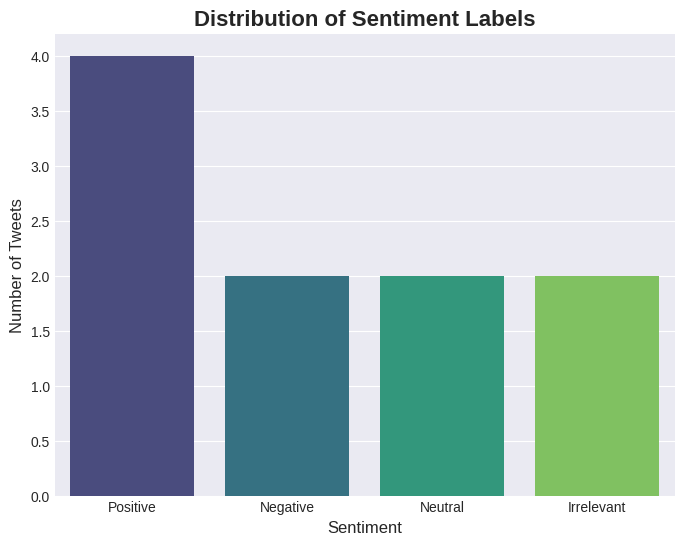


Generating Top 10 Entities Distribution chart...


/tmp/ipython-input-1-2829319890.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.index, y=top_entities.values, palette='magma')


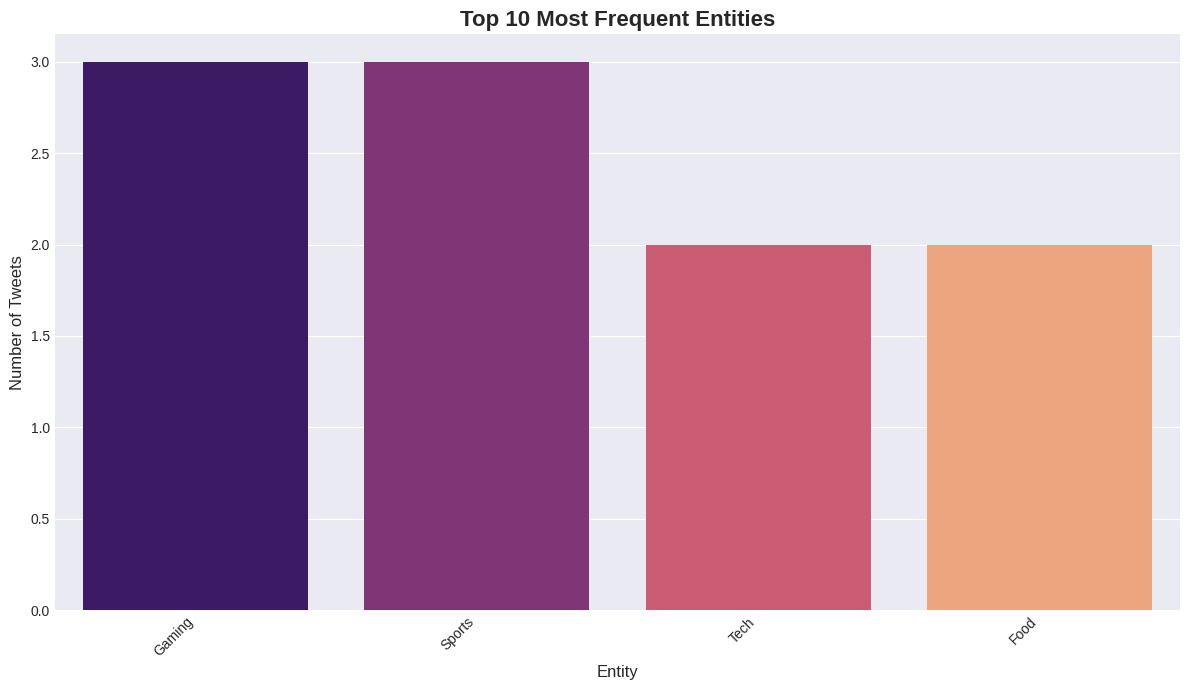


Generating Sentiment Distribution by Top Entities chart...


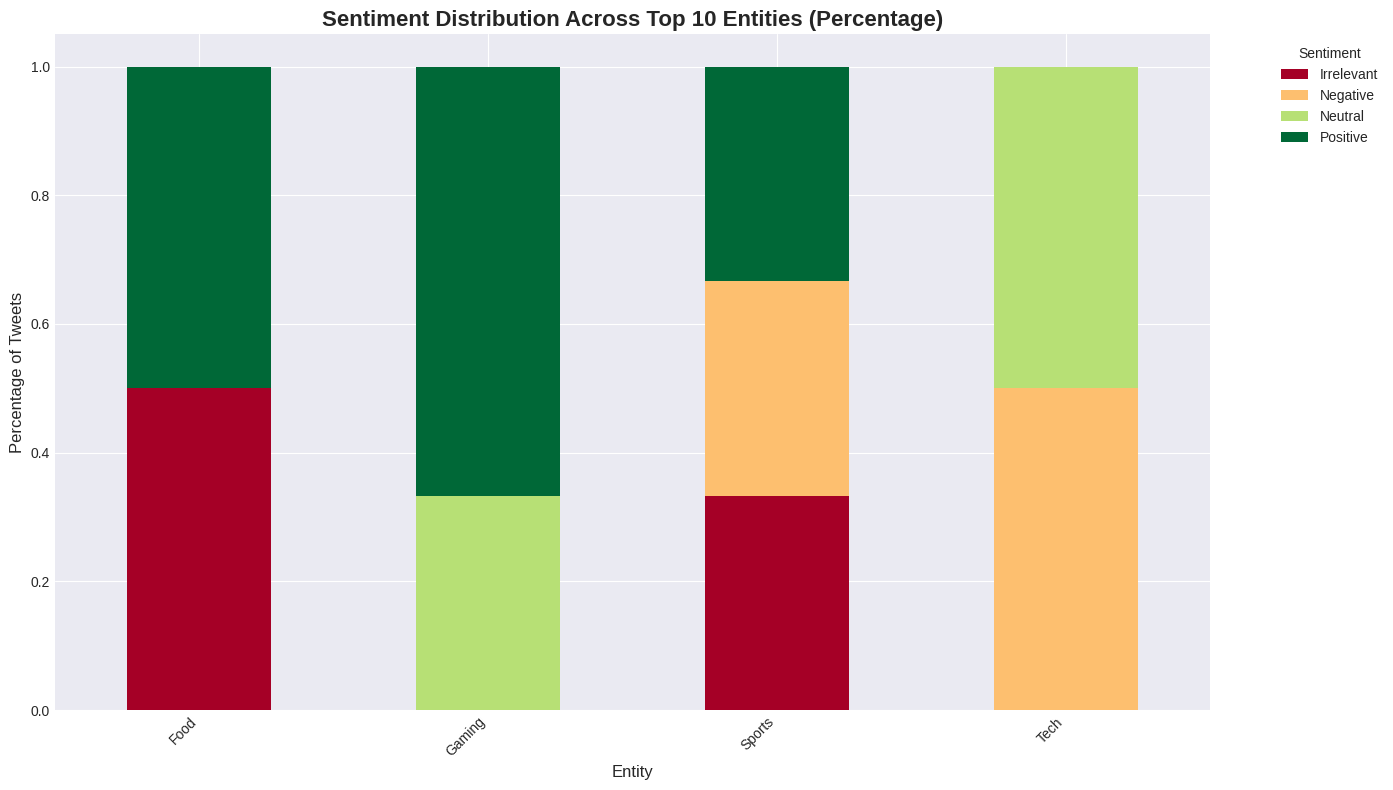


Generating Text Length Distribution chart...


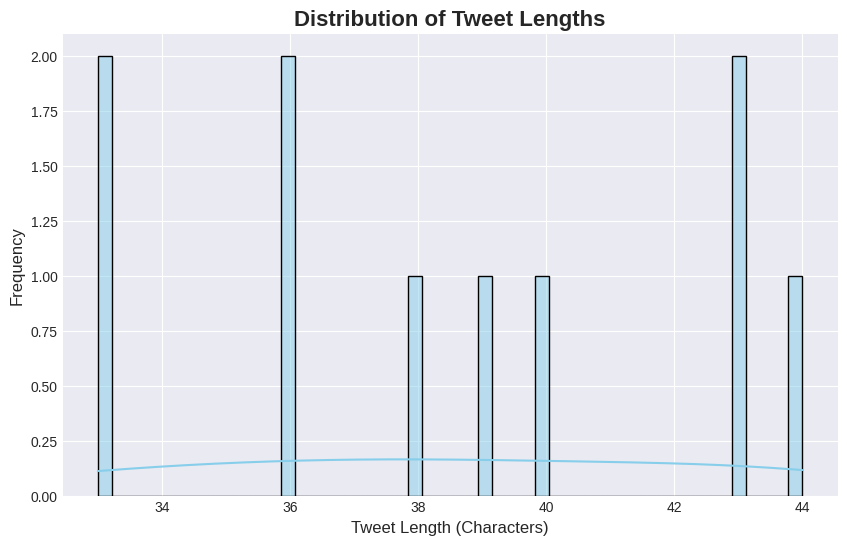


Generating Top 20 Most Common Words chart...


/tmp/ipython-input-1-2829319890.py:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=words_df, palette='GnBu_r')


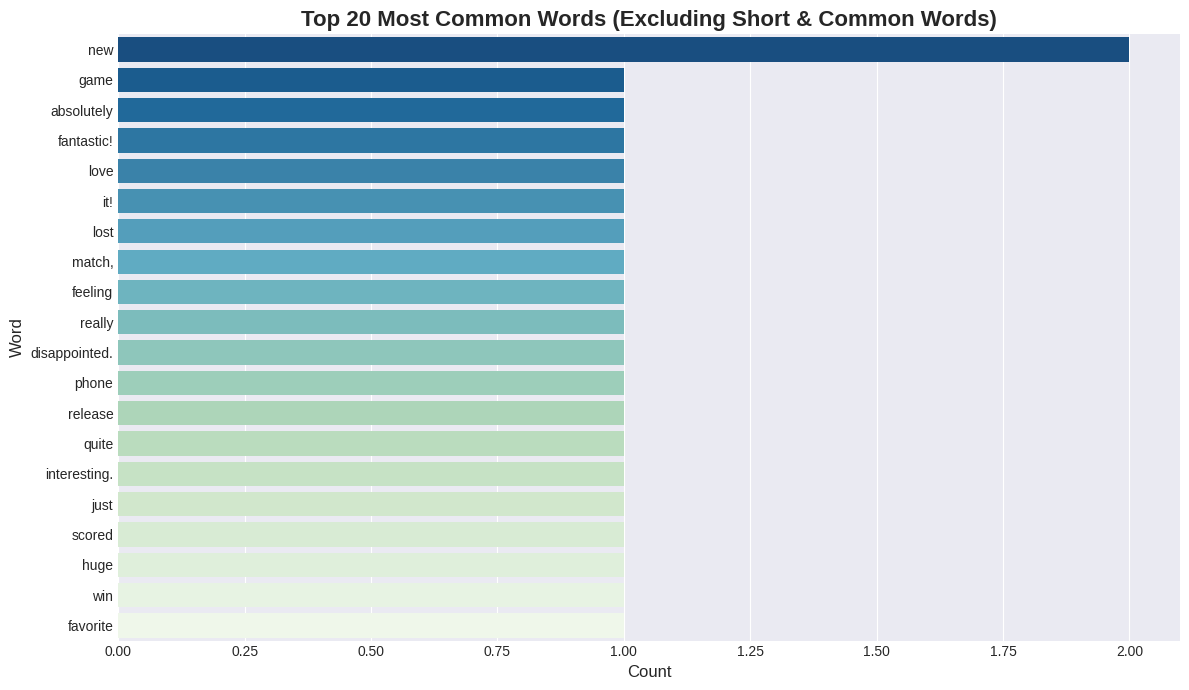


Data analysis and visualization complete.


In [1]:
# -*- coding: utf-8 -*-
"""
Data Analysis Script for 'twitter_training.csv'

This script loads the 'twitter_training.csv' dataset, performs initial
data exploration, cleaning, and generates visualizations to understand
the distribution of sentiments and entities within the dataset.

Assumptions:
- The dataset is named 'twitter_training.csv' and is uploaded to your
  Google Colab environment or is in the same directory as this script.
- The dataset has no header row.
- The columns are in the following order:
  1. tweet_id (integer)
  2. entity (string, e.g., 'Borderlands', 'Xbox')
  3. sentiment_label (string, e.g., 'Positive', 'Negative', 'Neutral', 'Irrelevant')
  4. tweet_text (string, the actual tweet content)
"""

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # For basic text cleaning (e.g., removing URLs, mentions)
from collections import Counter # For counting word frequencies

# Set a stylish plot style for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported successfully.")

# 2. Load the Dataset
file_path = 'twitter_training.csv'

try:
    # Load the CSV file. Assuming no header and specific column names.
    df = pd.read_csv(file_path, header=None)
    # Assign column names based on the typical structure of twitter_training.csv
    df.columns = ['tweet_id', 'entity', 'sentiment_label', 'tweet_text']
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure 'twitter_training.csv' is uploaded to your Colab environment or is in the correct directory.")
    # Create a dummy DataFrame for demonstration if the file is not found
    print("Creating a dummy DataFrame for demonstration purposes.")
    data = {
        'tweet_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'entity': ['Gaming', 'Sports', 'Tech', 'Gaming', 'Food', 'Sports', 'Tech', 'Gaming', 'Food', 'Sports'],
        'sentiment_label': ['Positive', 'Negative', 'Neutral', 'Positive', 'Irrelevant', 'Positive', 'Negative', 'Neutral', 'Positive', 'Irrelevant'],
        'tweet_text': [
            "This game is absolutely fantastic! Love it!",
            "Lost the match, feeling really disappointed.",
            "New phone release is quite interesting.",
            "Just scored a huge win in my favorite game!",
            "What's for dinner? I'm so hungry.",
            "Great performance by the team today!",
            "Software update broke everything. Ugh.",
            "Another fun gaming session with friends.",
            "Trying out a new restaurant tonight.",
            "The referee made a terrible call."
        ]
    }
    df = pd.DataFrame(data)


# 3. Initial Data Exploration
print("\n--- Initial Data Exploration ---")
print("\nDataFrame Info:")
df.info()

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDescriptive Statistics for numerical columns:")
print(df.describe())

print("\nMissing values before cleaning:")
print(df.isnull().sum())

print("\nUnique values in 'entity' column:")
print(df['entity'].nunique())
print(df['entity'].value_counts().head()) # Top entities

print("\nUnique values in 'sentiment_label' column:")
print(df['sentiment_label'].nunique())
print(df['sentiment_label'].value_counts()) # Sentiment distribution


# 4. Data Cleaning
print("\n--- Data Cleaning ---")

# Handle missing values in 'tweet_text' as it's crucial for analysis
initial_rows = df.shape[0]
df.dropna(subset=['tweet_text'], inplace=True)
print(f"Removed {initial_rows - df.shape[0]} rows with missing 'tweet_text'.")

# Handle missing values in 'entity' and 'sentiment_label' if any
# For 'entity', we might fill with 'Unknown' or the mode, depending on context.
# For 'sentiment_label', dropping is usually safer if it's the target variable.
# Here, we'll drop for simplicity, but consider imputation if data loss is significant.
initial_rows_after_text_drop = df.shape[0]
df.dropna(subset=['entity', 'sentiment_label'], inplace=True)
print(f"Removed {initial_rows_after_text_drop - df.shape[0]} rows with missing 'entity' or 'sentiment_label'.")

print("\nMissing values after initial cleaning:")
print(df.isnull().sum())

# Handle duplicate rows
initial_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Removed {initial_duplicates} duplicate rows.")

print(f"\nDataFrame shape after cleaning: {df.shape}")

# Ensure 'tweet_text' is string type
df['tweet_text'] = df['tweet_text'].astype(str)

# Basic Text Preprocessing for EDA (e.g., removing URLs, mentions, hashtags)
def clean_text_for_eda(text):
    """
    Performs basic cleaning for exploratory data analysis:
    - Removes URLs
    - Removes Twitter handles (@mentions)
    - Removes hashtags (#) symbol, but keeps the word
    - Converts to lowercase
    - Removes extra spaces
    """
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\w+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text) # Remove # symbol
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text_for_eda)
print("\nSample of original vs. cleaned tweet text:")
print(df[['tweet_text', 'cleaned_tweet_text']].head())


# 5. Exploratory Data Analysis (EDA) and Visualization
print("\n--- Exploratory Data Analysis & Visualization ---")

# 5.1. Sentiment Label Distribution (Bar Chart)
print("\nGenerating Sentiment Label Distribution chart...")
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis', order=df['sentiment_label'].value_counts().index)
plt.title('Distribution of Sentiment Labels', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 5.2. Top 10 Entities Distribution (Bar Chart)
print("\nGenerating Top 10 Entities Distribution chart...")
top_entities = df['entity'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_entities.index, y=top_entities.values, palette='magma')
plt.title('Top 10 Most Frequent Entities', fontsize=16, fontweight='bold')
plt.xlabel('Entity', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5.3. Sentiment Distribution by Entity (Stacked Bar Chart or Heatmap)
# For a large number of entities, a heatmap might be better.
# For fewer entities, a stacked bar chart is good.
# Let's visualize for the top N entities to keep it readable.
print("\nGenerating Sentiment Distribution by Top Entities chart...")
top_n_entities = 10 # Adjust as needed
top_entities_list = df['entity'].value_counts().head(top_n_entities).index.tolist()
df_filtered_entities = df[df['entity'].isin(top_entities_list)]

sentiment_by_entity = df_filtered_entities.groupby(['entity', 'sentiment_label']).size().unstack(fill_value=0)
# Normalize to percentages for better comparison across entities
sentiment_by_entity_percent = sentiment_by_entity.apply(lambda x: x / x.sum(), axis=1)

sentiment_by_entity_percent.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='RdYlGn')
plt.title(f'Sentiment Distribution Across Top {top_n_entities} Entities (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Entity', fontsize=12)
plt.ylabel('Percentage of Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5.4. Text Length Distribution
print("\nGenerating Text Length Distribution chart...")
df['tweet_length'] = df['cleaned_tweet_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Tweet Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 5.5. Word Frequency Analysis (Top words)
print("\nGenerating Top 20 Most Common Words chart...")
all_words = ' '.join(df['cleaned_tweet_text']).split()
# Filter out very common English words (stopwords) for more meaningful insights
# You might want to use NLTK stopwords here for a more robust approach
# For simplicity, we'll just filter out some very short common words for now.
# If you have NLTK installed:
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
# Otherwise, a simple filter:
filtered_words = [word for word in all_words if len(word) > 2 and word not in ['the', 'and', 'to', 'a', 'of', 'i', 'is', 'it', 'in', 'you', 'for', 'on', 'with', 'that', 'this', 'have', 'be', 'are', 'not', 'as', 'at', 'but', 'by', 'from', 'or', 'was', 'were', 'had']]

word_counts = Counter(filtered_words)
top_common_words = word_counts.most_common(20)
words_df = pd.DataFrame(top_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Word', data=words_df, palette='GnBu_r')
plt.title('Top 20 Most Common Words (Excluding Short & Common Words)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

print("\nData analysis and visualization complete.")
